# Random Number Generation Plots


## General imports


In [1]:
import os
import sys

sys.path.append("/home/mila/y/younesse.kaddar/multiobjective-lm")
print(sys.path)

os.environ["HF_HOME"] = "/network/scratch/y/younesse.kaddar/huggingface"

['/Users/youdar/GitHub/multiobjective-lm/rng/notebooks', '/Users/youdar/.pyenv/versions/3.11.1/lib/python311.zip', '/Users/youdar/.pyenv/versions/3.11.1/lib/python3.11', '/Users/youdar/.pyenv/versions/3.11.1/lib/python3.11/lib-dynload', '', '/Users/youdar/.local/lib/python3.11/site-packages', '/Users/youdar/.pyenv/versions/3.11.1/lib/python3.11/site-packages', '/home/mila/y/younesse.kaddar/multiobjective-lm']


In [2]:
import random
import json
import numpy as np
from tqdm import tqdm
import pandas as pd

In [16]:
import matplotlib
import matplotlib.font_manager
import matplotlib.pyplot as plt
import shutil

import seaborn as sns
from IPython.display import display, Markdown

# # # Remove the matplotlib cache
# # shutil.rmtree(matplotlib.get_cachedir())

# fonts = matplotlib.font_manager.findSystemFonts(fontpaths=None, fontext="ttf")

# # print the names of all fonts
# font_names = [matplotlib.font_manager.get_font(x).family_name for x in fonts]
# print(font_names)

# fonts = [f.name for f in matplotlib.font_manager.fontManager.ttflist]
# print(fonts)
# print("Times New Roman" in fonts)

# plt.rcParams["font.family"] = "Times New Roman"
# matplotlib.rc("font", family="Times New Roman")

# print(matplotlib.get_configdir())
# print(matplotlib.get_cachedir())

# Load the data


In [10]:
import seaborn as sns
import os
from IPython.display import display, Markdown
import re
import unidecode

n_max = 100
intro_prompt = f"The following is a random integer drawn uniformly between 0 and "
prompt = f"{intro_prompt}{n_max-1}: "
n_samples = 1000 * 512

In [18]:
df_gfn = pd.read_csv(
    "../../data/rng/GFN-dist_inference_rng_gpt-j_50samples_len5_3000steps_rewtemp5.0_seed_True.csv"
)
df_vanilla = pd.read_csv(
    "../../data/rng/dist_vanilla_rng_gpt-j_50samples_len5_3000steps_rewtemp5.0_seed_True.csv"
)

df_ppo = pd.read_csv(
    "../../data/rng/PPO_nb-numbers_490589_nb-NaNs_21411_gpt-j_batch_size_8_mini_batch_size_1_steps_512_learning_rate_1.41e-05_ppo_epochs_1_gradient_accumulation_steps_8_target_kl_0.1_init_kl_coef_0.2_seed_42.csv"
)

In [28]:
def slugify(text):
    text = unidecode.unidecode(text).lower()
    return re.sub(r"[\W_]+", "-", text)


def plot_distribution_single(
    dist,
    n_max=512 * 8,
    model_name="Model",
    color="lightseagreen",
    xlims=None,
    number_of_NaNs=0,
    font="Times New Roman",
    filename="model",
):
    plt.rcParams["font.family"] = font
    plt.rcParams["font.size"] = 20  # Increase font size for tick labels

    display(Markdown(f"## {model_name}: Distribution of generated numbers"))

    sns.set_theme(style="whitegrid", font=font)

    bins = range(min(dist), max(dist) + 2)

    plot = sns.histplot(dist, color=color, linewidth=0, bins=bins, stat="probability")

    plot.set_xlabel(
        "Generated number", fontsize=20
    )  # Increase font size for x-axis label
    plot.set_ylabel(
        "Probability mass", fontsize=20
    )  # Increase font size for y-axis label

    if xlims is not None:
        plot.set_xlim(xlims)

    if not os.path.exists("plots"):
        os.makedirs("plots")
    plot.figure.savefig(f"plots/{slugify(model_name)}.pdf", bbox_inches="tight")
    plt.show()

## GFN: Distribution of generated numbers

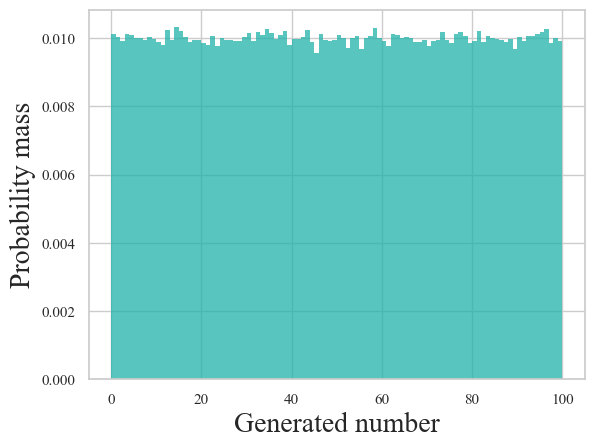

In [29]:
plot_distribution_single(
    df_gfn["Generated Numbers"],
    n_max=n_max,
    model_name="GFN",
    color="lightseagreen",
    number_of_NaNs=0,
    xlims=(-5, n_max + 5),
)

## Vanilla: Distribution of generated numbers

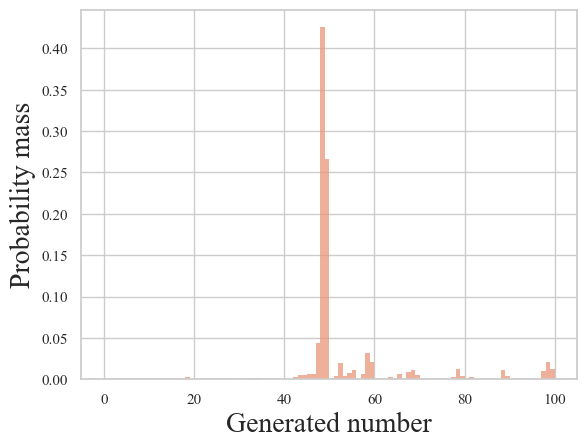

In [30]:
plot_distribution_single(
    df_vanilla["Generated Numbers"],
    n_max=n_max,
    model_name="Vanilla",
    color="darksalmon",
    number_of_NaNs=253591,
    xlims=(-5, n_max + 5),
)

## PPO: Distribution of generated numbers

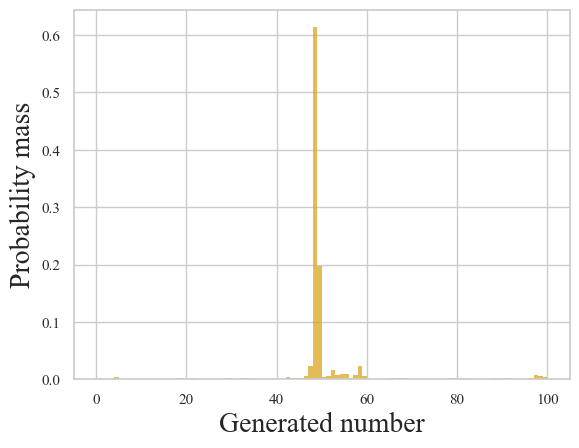

In [31]:
plot_distribution_single(
    df_ppo["Generated Numbers"],
    n_max=n_max,
    model_name="PPO",
    color="goldenrod",
    number_of_NaNs=0,
    xlims=(-5, n_max + 5),
)

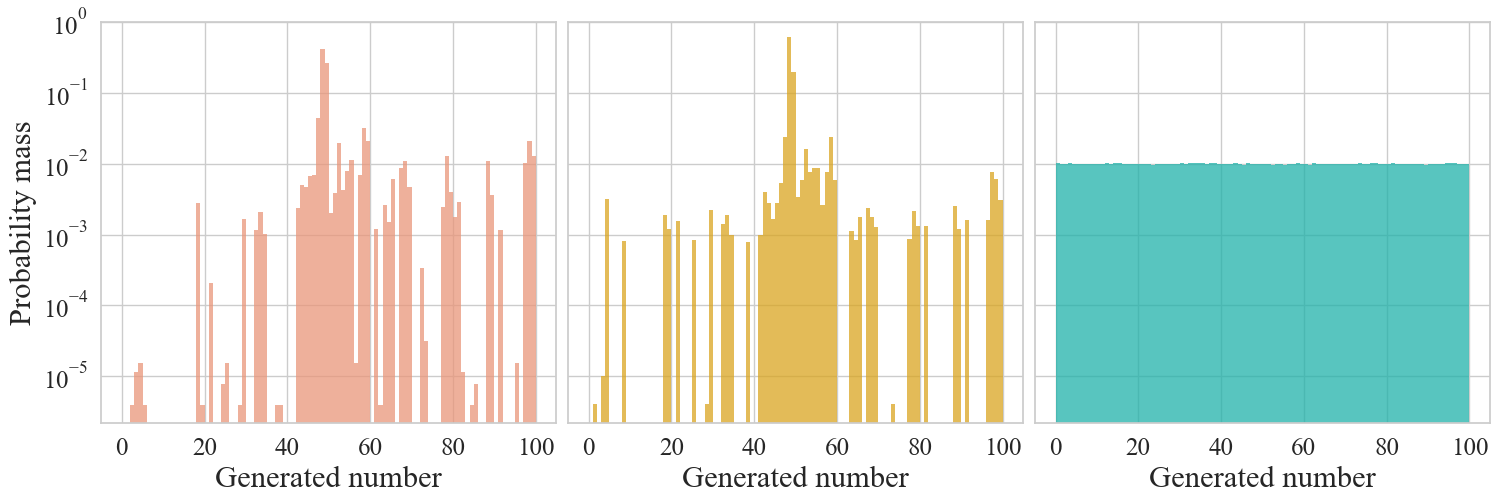

In [48]:
def plot_distribution(
    ax,
    dist,
    n_max=512 * 8,
    model_name="Model",
    color="lightseagreen",
    xlims=None,
    number_of_NaNs=0,
    font="Times New Roman",
    filename="model",
    total_numbers=512000,
):
    plt.rcParams["font.family"] = font
    plt.rcParams["font.size"] = 16

    sns.set_theme(style="whitegrid", font=font)

    bins = range(min(dist), max(dist) + 2)

    plot = sns.histplot(
        dist, color=color, linewidth=0, bins=bins, stat="probability", ax=ax
    )

    plot.set_xlabel("Generated number", fontsize=22)
    plot.set_ylabel("Probability mass", fontsize=22)

    if xlims is not None:
        plot.set_xlim(xlims)

    plot.set_yscale("log")
    plot.set_ylim(top=1)

    # # custom y-axis ticks
    # plot.set_yticks([0.0001, 0.001, 0.01, 0.1, 1])

    plot.tick_params(axis="both", which="major", labelsize=18)

    # valid_percentage = (total_numbers - number_of_NaNs) / total_numbers * 100
    # plot.set_title(f"{model_name}\n({valid_percentage:.1f}% of samples are valid numbers)")

    # if not os.path.exists("plots"):
    #     os.makedirs("plots")
    # plot.figure.savefig(f"plots/{slugify(model_name)}.pdf", bbox_inches="tight")


def plot_all_distributions(df_gfn, df_vanilla, df_ppo, n_max):
    fig, axs = plt.subplots(1, 3, sharey=True, figsize=(15, 5))

    plot_distribution(
        axs[0],
        df_vanilla["Generated Numbers"],
        n_max=n_max,
        model_name="Base model",
        color="darksalmon",
        number_of_NaNs=253591,
        xlims=(-5, n_max + 5),
    )

    plot_distribution(
        axs[1],
        df_ppo["Generated Numbers"],
        n_max=n_max,
        model_name="PPO",
        color="goldenrod",
        number_of_NaNs=21411,
        xlims=(-5, n_max + 5),
    )

    plot_distribution(
        axs[2],
        df_gfn["Generated Numbers"],
        n_max=n_max,
        model_name="GFlowNet",
        color="lightseagreen",
        number_of_NaNs=0,
        xlims=(-5, n_max + 5),
    )

    plt.tight_layout(pad=0.5)
    plt.show()
    fig.savefig(f"plots/all_single-prompt.pdf", bbox_inches="tight")


plot_all_distributions(df_gfn, df_vanilla, df_ppo, n_max)

In [62]:
# KL divergence
from scipy.stats import entropy
from scipy.spatial.distance import jensenshannon
from numpy import sqrt

pmf_vanilla = np.histogram(df_vanilla["Generated Numbers"], bins=n_max)[0] / 512000
pmf_ppo = np.histogram(df_ppo["Generated Numbers"], bins=n_max)[0] / 512000
pmf_gfn = np.histogram(df_gfn["Generated Numbers"], bins=n_max)[0] / 512000
pmf_uniform = np.ones(n_max) / n_max

# add NaNs
pmf_vanilla = np.append(pmf_vanilla, 253591 / 512000)
pmf_ppo = np.append(pmf_ppo, 21411 / 512000)
pmf_gfn = np.append(pmf_gfn, 0)
pmf_uniform = np.append(pmf_uniform, 0)

kl_vanilla = entropy(pmf_vanilla, pmf_uniform)
kl_ppo = entropy(pmf_ppo, pmf_uniform)
kl_gfn = entropy(pmf_gfn, pmf_uniform)

print(f"KL divergence for Vanilla: {kl_vanilla:.2f}")
print(f"KL divergence for PPO: {kl_ppo:.2f}")
print(f"KL divergence for GFN: {kl_gfn}")

# Compute the square root of the Jensen-Shannon divergences
jsd_vanilla = sqrt(jensenshannon(pmf_vanilla, pmf_uniform))
jsd_ppo = sqrt(jensenshannon(pmf_ppo, pmf_uniform))
jsd_gfn = sqrt(jensenshannon(pmf_gfn, pmf_uniform))

print(f"Jensen-Shannon divergence for Vanilla: {jsd_vanilla}")
print(f"Jensen-Shannon divergence for PPO: {jsd_ppo}")
print(f"Jensen-Shannon divergence for GFN: {jsd_gfn}")

KL divergence for Vanilla: inf
KL divergence for PPO: inf
KL divergence for GFN: 9.748265656680799e-05
Jensen-Shannon divergence for Vanilla: 0.8743455347474746
Jensen-Shannon divergence for PPO: 0.8985026111850993
Jensen-Shannon divergence for GFN: 0.07026726860176742
